# Linear Regression with Scikit  Learn

* ### Name: John Tharian
* ### Email: jtharian13@gmail.com
    
In this regression task we will predict the percentage of marks
that a student is expected to score based upon the number of 
hours they studied. This is a simple linear regression task as it 
involves just two variables.

### Importing the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the data

In [3]:
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the data

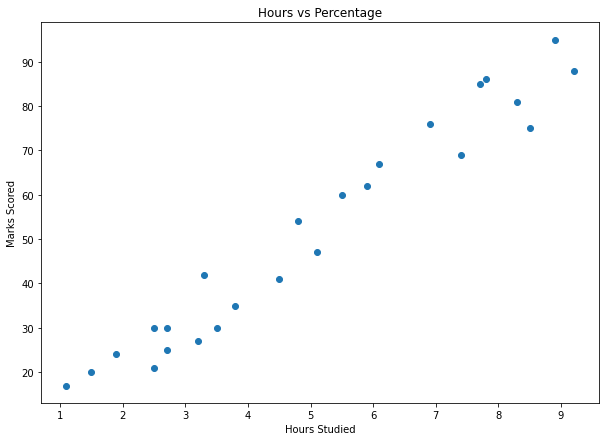

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Hours vs Percentage')
plt.show()

### Data Preprocessing

In [13]:
X=np.array(data.iloc[:,:-1].values)
y=np.array(data.iloc[:,1].values)

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [18]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [19]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [20]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [21]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### Training the Model

In [22]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

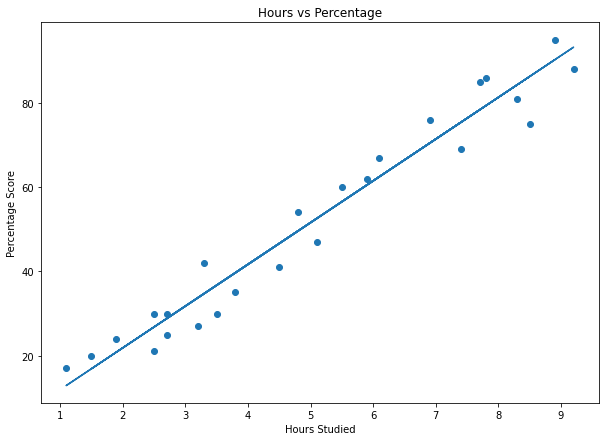

In [24]:
line=regressor.coef_*X+regressor.intercept_

plt.figure(figsize=(10,7))
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Making Predictions

In [25]:
pred=regressor.predict(X_test)

In [26]:
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Checking Accuracy

In [28]:
df = pd.DataFrame({'Real': y_test, 'Predicted': pred})  
df

,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


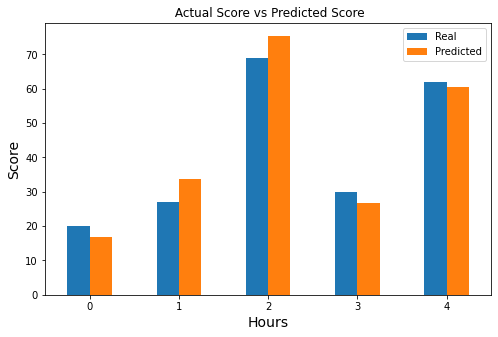

In [30]:
df.plot(kind='bar',figsize=(8,5))
plt.title(' Actual Score vs Predicted Score')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Hours', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

In [32]:
print("Mean squared error:",mean_squared_error(y_test,pred))

Mean squared error: 21.598769307217456
